In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob

from retinaface import RetinaFace
import torch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [3]:
def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (upper-left x, upper-left y, lower-right x,
    # lower-right y) format to the matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

In [43]:
train_img_paths = glob('/opt/ml/input/data/train/images/*/*')
test_img_paths = glob('/opt/ml/input/data/evalimages/*')

train_df = pd.DataFrame(train_img_paths,columns=['img_path'])
test_df = pd.DataFrame(test_img_paths,columns=['img_path'])

train_bbox = pd.DataFrame(columns=['1','2','3','4'])
test_bbox = pd.DataFrame(columns=['1','2','3','4'])

In [45]:
# Face Detection in Train Data
for i, img_path in enumerate(tqdm(train_img_paths)):
    faces = RetinaFace.detect_faces(img_path)
    try:
        train_bbox.loc[i] = faces['face_1']['facial_area']
    except:
        test_bbox.loc[i] = [0,0,0,0]

100%|██████████| 18900/18900 [5:54:31<00:00,  1.13s/it]  


In [ ]:
# Face Detection in Test Data
for i, img_path in enumerate(tqdm(test_img_paths)):
    faces = RetinaFace.detect_faces(img_path)
    try:
        train_bbox.loc[i] = faces['face_1']['facial_area']
    except:
        test_bbox.loc[i] = [0,0,0,0]

In [46]:
train_df = pd.concat([train_df,train_bbox],axis=1)
test_df = pd.concat([test_df,test_bbox],axis=1)

In [405]:
# Train Data
# Indexes of Undetected Faces
train_df.loc[(train_df['1']==0)&(train_df['2']==0)&(train_df['3']==0)&(train_df['4']==0)].index

Int64Index([17899, 18074, 18079, 18324, 18578], dtype='int64')

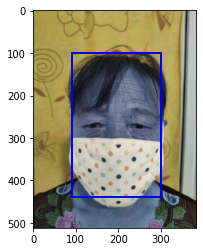

In [416]:
# Annotate Undetected Faces by hand
i = 18578
box = [90,100,300,440]
fig = plt.imshow(cv2.imread(train_df.loc[i,'img_path']))
fig.axes.add_patch(bbox_to_rect(box, 'blue'));
train_df.loc[i] = [train_df.loc[i]['img_path']] + box

In [417]:
train_df.to_csv('train_crop.csv')

In [ ]:
# Test Data
# Indexes of Undetected Faces
test_df.loc[(test_df['1']==0)&(test_df['2']==0)&(test_df['3']==0)&(test_df['4']==0)].index

Int64Index([17899, 18074, 18079, 18324, 18578], dtype='int64')

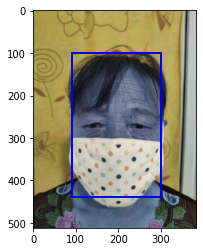

In [ ]:
# Annotate Undetected Faces by hand
i = 18578
box = [90,100,300,440]
fig = plt.imshow(cv2.imread(test_df.loc[i,'img_path']))
fig.axes.add_patch(bbox_to_rect(box, 'blue'));
test_df.loc[i] = [test_df.loc[i]['img_path']] + box

In [ ]:
test_df.to_csv('test_crop.csv')